In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: AM
Digite os 2 primeiros digitos do shapefile: 13


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6184 entries, 0 to 6183
Data columns (total 14 columns):
ID            6184 non-null int64
CD_GEOCODI    6184 non-null object
TIPO          6184 non-null object
CD_GEOCODB    3139 non-null object
NM_BAIRRO     3139 non-null object
CD_GEOCODS    6184 non-null object
NM_SUBDIST    2398 non-null object
CD_GEOCODD    6184 non-null object
NM_DISTRIT    6184 non-null object
CD_GEOCODM    6184 non-null object
NM_MUNICIP    6184 non-null object
NM_MICRO      6184 non-null object
NM_MESO       6184 non-null object
geometry      6184 non-null object
dtypes: int64(1), object(13)
memory usage: 676.5+ KB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [5]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(5641, 13)

In [7]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,130002905000001,146.0,796.0,"5,45","7,04","563,03","2037839,17","1110,84","3430898,17","240,11","654545,56","932,21","1904167,36"
1,130002905000002,196.0,1090.0,"5,56",8,"558,4","853145,39","710,69","978401,81","243,57","321167,01","591,07","574797,84"
2,130002905000003,146.0,806.0,"5,52","9,77","655,95","330577,16","825,59","275540,61","285,81","234929,56","798,75","246895,13"
3,130002905000004,23.0,118.0,"5,13","9,66","460,61","81966,7","588,56","26341,08","147,79","68960,77","564,27","26355,92"
4,130002905000006,103.0,564.0,"5,48","7,6","538,83","146533,92","637,93","109844,51","208,37","113619,16","576,35","102096,93"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [9]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5641 entries, 0 to 5640
Data columns (total 26 columns):
ID            5641 non-null int64
CD_GEOCODI    5641 non-null int64
TIPO          5641 non-null object
CD_GEOCODB    3112 non-null object
NM_BAIRRO     3112 non-null object
CD_GEOCODS    5641 non-null object
NM_SUBDIST    2375 non-null object
CD_GEOCODD    5641 non-null object
NM_DISTRIT    5641 non-null object
CD_GEOCODM    5641 non-null object
NM_MUNICIP    5641 non-null object
NM_MICRO      5641 non-null object
NM_MESO       5641 non-null object
geometry      5641 non-null object
V001          5625 non-null float64
V002          5625 non-null float64
V003          5625 non-null object
V004          5625 non-null object
V005          5625 non-null object
V006          5625 non-null object
V007          5530 non-null object
V008          5530 non-null object
V009          5641 non-null object
V010          5641 non-null object
V011          5566 non-null object
V012      

In [11]:
del gdf
del dados

Text(0.5,1,'AM')

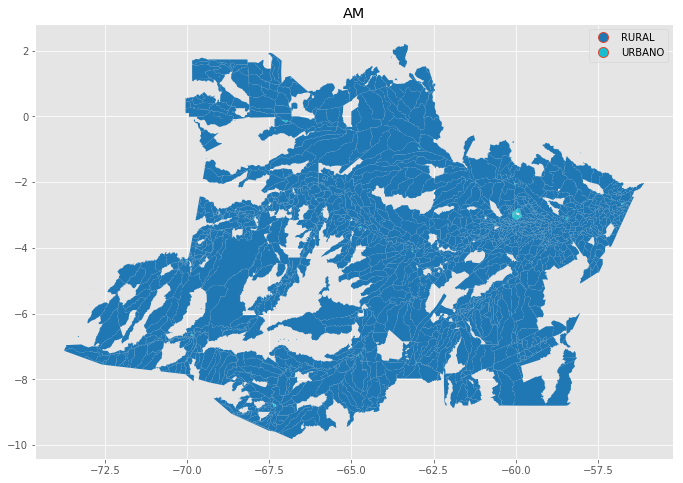

In [12]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [17]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
5243,Carauari,AM,5.584,1301001.0,POLYGON ((-66.90560794171533 -4.87294904850836...,5.584106
5356,Careiro,AM,2.803,1301100.0,POLYGON ((-60.36227748609772 -3.82605276241382...,2.802607
5358,AlvarÃ£es,AM,1.442,1300029.0,POLYGON ((-64.81956761813414 -3.21734940264604...,1.441579
5359,AmaturÃ¡,AM,1.484,1300060.0,POLYGON ((-68.20640913311149 -3.36395411598014...,1.484026
5360,AnamÃ£,AM,0.656,1300086.0,POLYGON ((-61.40492056860724 -3.57031420437669...,0.656227


In [18]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 62 entries, 5243 to 5417
Data columns (total 6 columns):
Municipio     62 non-null object
UF            62 non-null object
Area_Urb      62 non-null float64
CD_GEOCODM    62 non-null int64
geometry      62 non-null object
Area          62 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.4+ KB


In [19]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no AM')

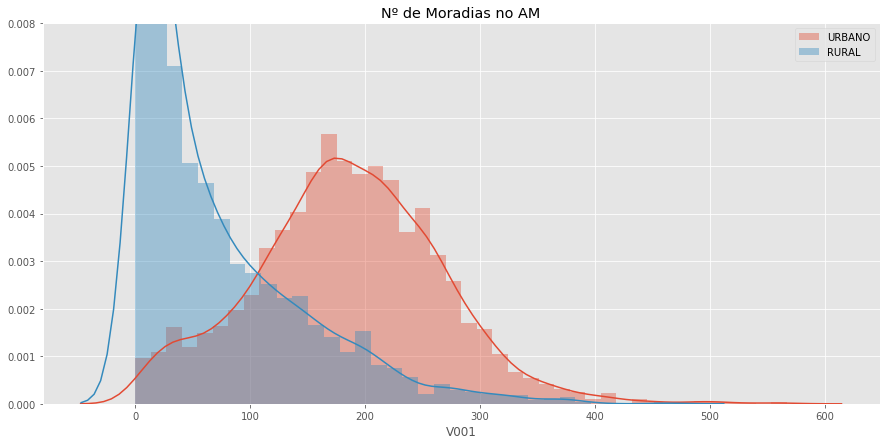

In [20]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    2068.000000
mean       68.132979
std        72.239243
min         0.000000
25%        14.000000
50%        40.000000
75%       103.000000
max       465.000000
Name: V001, dtype: float64
URBANO 
 count    3573.000000
mean      184.363280
std        81.372625
min         0.000000
25%       132.000000
50%       184.000000
75%       237.000000
max       567.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

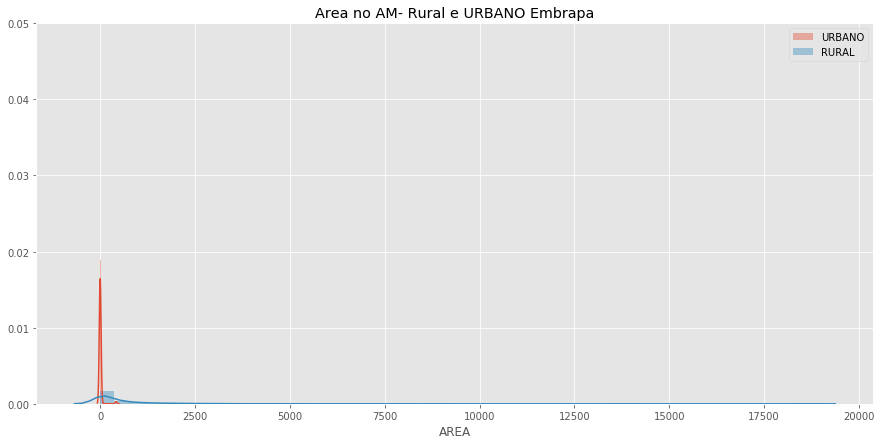

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [23]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

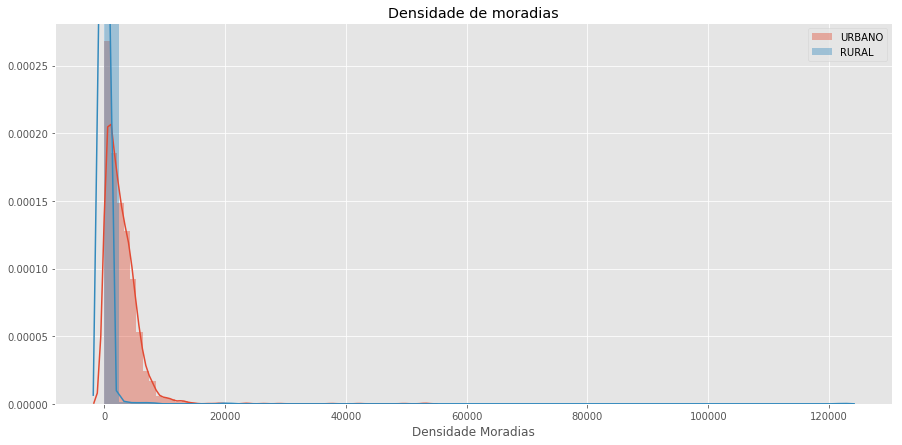

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [25]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count      2068.000000
mean        167.700178
std        2798.891307
min           0.000000
25%           0.049637
50%           0.419442
75%          11.068967
max      122327.519144
Name: Densidade Moradias, dtype: float64
URBANO 
 count     3573.000000
mean      2817.373471
std       2953.882657
min          0.000000
25%        907.469258
50%       2234.070818
75%       4041.630589
max      53339.394720
Name: Densidade Moradias, dtype: float64


In [26]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000
mean,4323.604167,1.302542e+14,49.500000,273.166667,0.036826,5613.794830
std,2569.816665,1.682630e+11,54.533613,282.691045,0.050297,17692.283592
min,1182.000000,1.300201e+14,5.000000,17.000000,0.000327,847.077893
25%,1581.250000,1.300662e+14,19.000000,99.500000,0.005397,984.249059
50%,4722.000000,1.303058e+14,27.000000,150.500000,0.015996,1549.721040
75%,6780.250000,1.304073e+14,50.250000,312.750000,0.035215,3290.434096
max,6985.000000,1.304237e+14,225.000000,1075.000000,0.198187,122327.519144


## Descrição da área por setor censitários urbanos e rurais

In [27]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count     62.000000
mean      11.696944
std       53.765712
min        0.208339
25%        1.962204
50%        3.257718
75%        7.069034
max      427.083376
Name: Area, dtype: float64
RURAL 
 count     2068.000000
mean       561.328336
std       1036.749822
min          0.000327
25%          1.993870
50%        180.337338
75%        674.959298
max      18698.588400
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

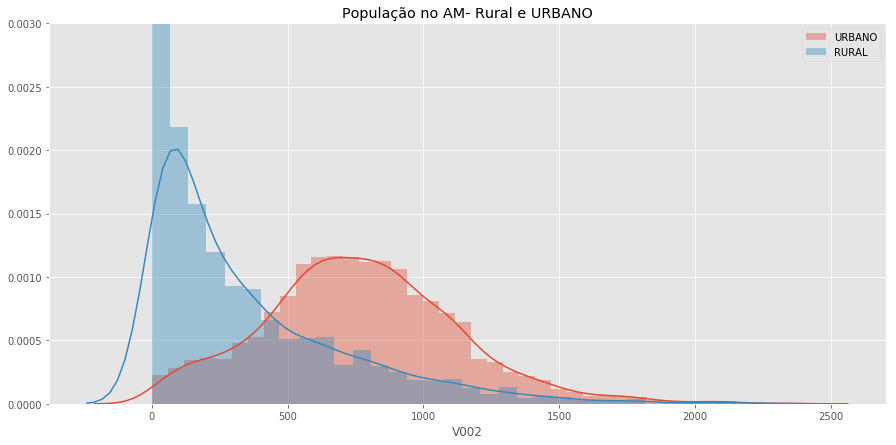

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    2068.000000
mean      349.746132
std       365.809685
min         0.000000
25%        75.000000
50%       218.500000
75%       515.250000
max      2285.000000
Name: V002, dtype: float64
URBANO 
 count    3573.000000
mean      768.356563
std       360.096152
min         0.000000
25%       535.000000
50%       753.000000
75%       987.000000
max      2353.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [30]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [31]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [32]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
if scrcu['ID'].count()>0:
    plt.style.use('ggplot')
    scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
    plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


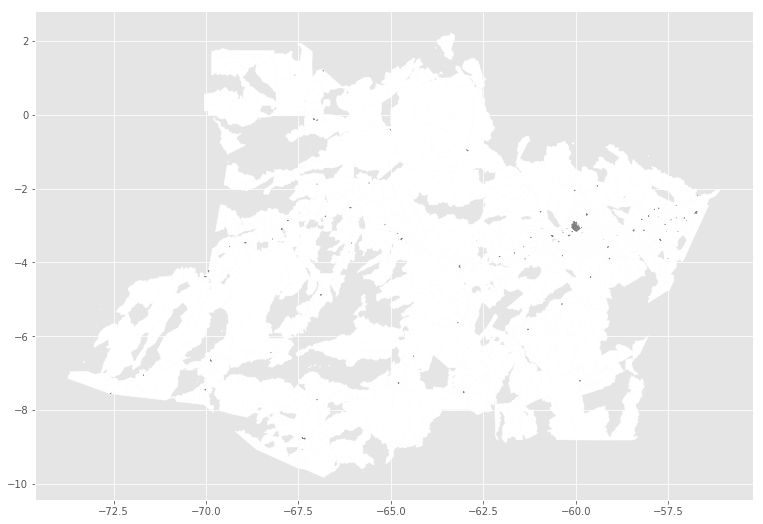

In [36]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [37]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [38]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [39]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

In [40]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [41]:
regioes_urbanas_df.head()

,geometry,FONTE
5243,POLYGON ((-66.90560794171533 -4.87294904850836...,0.0
5356,POLYGON ((-60.36227748609772 -3.82605276241382...,0.0
5358,POLYGON ((-64.81956761813414 -3.21734940264604...,0.0
5359,POLYGON ((-68.20640913311149 -3.36395411598014...,0.0
5360,POLYGON ((-61.40492056860724 -3.57031420437669...,0.0


In [42]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [43]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [44]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
